Importing the required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading dataset

In [5]:
# Reading the dataset
data = pd.read_csv("Airbnb NYC 2019.csv")
data.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
data.head().T

0  \
id                                                            2539   
name                            Clean & quiet apt home by the park   
host_id                                                       2787   
host_name                                                     John   
neighbourhood_group                                       Brooklyn   
neighbourhood                                           Kensington   
latitude                                                  40.64749   
longitude                                                -73.97237   
room_type                                             Private room   
price                                                          149   
minimum_nights                                                   1   
number_of_reviews                                                9   
last_review                                             2018-10-19   
reviews_per_month                                             0.21   
calculated_host_listings_count                                   6   
availability_365                                               365   

                                                    1  \
id                                               2595   
name                            Skylit Midtown Castle   
host_id                                          2845   
host_name                                    Jennifer   
neighbourhood_group                         Manhattan   
neighbourhood                                 Midtown   
latitude                                     40.75362   
longitude                                   -73.98377   
room_type                             Entire home/apt   
price                                             225   
minimum_nights                                      1   
number_of_reviews                                  45   
last_review                                2019-05-21   
reviews_per_month                                0.38   
calculated_host_listings_count                      2   
availability_365                                  355   

                                                                  2  \
id                                                             3647   
name                            THE VILLAGE OF HARLEM....NEW YORK !   
host_id                                                        4632   
host_name                                                 Elisabeth   
neighbourhood_group                                       Manhattan   
neighbourhood                                                Harlem   
latitude                                                   40.80902   
longitude                                                  -73.9419   
room_type                                              Private room   
price                                                           150   
minimum_nights                                                    3   
number_of_reviews                                                 0   
last_review                                                     NaN   
reviews_per_month                                               NaN   
calculated_host_listings_count                                    1   
availability_365                                                365   

                                                              3  \
id                                                         3831   
name                            Cozy Entire Floor of Brownstone   
host_id                                                    4869   
host_name                                           LisaRoxanne   
neighbourhood_group                                    Brooklyn   
neighbourhood                                      Clinton Hill   
latitude                                               40.68514   
longitude                                             -73.95976   
room_type                                       Entire home/apt   
price                     

In [7]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

New column names for convinience

In [8]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}
# use a pandas function to rename the current function
data = data.rename(columns = rename_col)
data.head(5)

listing_id                                      listing_name  host_id  \
0        2539                Clean & quiet apt home by the park     2787   
1        2595                             Skylit Midtown Castle     2845   
2        3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3        3831                   Cozy Entire Floor of Brownstone     4869   
4        5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  total_reviews last_review  \
0     Private room    149               1              9  2018-10-19   
1  Entire home/apt    225               1             45  2019-05-21   
2     Private room    150               3              0         NaN   
3  Entire home/apt     89               1            270  2019-07-05   
4  Entire home/apt     80              10              9  2018-11-19   

   reviews_per_month  host_listings_count  availability_365  
0               0.21                    6               365  
1               0.38                    2               355  
2                NaN                    1               365  
3               4.64                    1               194  
4               0.10                    1                 0

In [9]:
data.shape

(48895, 16)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [11]:
data.count

<bound method DataFrame.count of        listing_id                                       listing_name  \
0            2539                 Clean & quiet apt home by the park   
1            2595                              Skylit Midtown Castle   
2            3647                THE VILLAGE OF HARLEM....NEW YORK !   
3            3831                    Cozy Entire Floor of Brownstone   
4            5022   Entire Apt: Spacious Studio/Loft by central park   
...           ...                                                ...   
48890    36484665    Charming one bedroom - newly renovated rowhouse   
48891    36485057      Affordable room in Bushwick/East Williamsburg   
48892    36485431            Sunny Studio at Historical Neighborhood   
48893    36485609               43rd St. Time Square-cozy single bed   
48894    36487245  Trendy duplex in the very heart of Hell's Kitchen   

        host_id      host_name neighbourhood_group       neighbourhood  \
0          2787           Jo

Removing duplicates if any from data

In [ ]:
data = data.drop_duplicates()
data.count

<bound method DataFrame.count of        listing_id                                       listing_name  \
0            2539                 Clean & quiet apt home by the park   
1            2595                              Skylit Midtown Castle   
2            3647                THE VILLAGE OF HARLEM....NEW YORK !   
3            3831                    Cozy Entire Floor of Brownstone   
4            5022   Entire Apt: Spacious Studio/Loft by central park   
...           ...                                                ...   
48890    36484665    Charming one bedroom - newly renovated rowhouse   
48891    36485057      Affordable room in Bushwick/East Williamsburg   
48892    36485431            Sunny Studio at Historical Neighborhood   
48893    36485609               43rd St. Time Square-cozy single bed   
48894    36487245  Trendy duplex in the very heart of Hell's Kitchen   

        host_id      host_name neighbourhood_group       neighbourhood  \
0          2787           Jo

Checking for null values

In [ ]:
data.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [14]:
data['listing_name'].fillna('unknown',inplace = True)
data['host_name'].fillna('no_name', inplace= True)

In [15]:
data.isnull().sum()

listing_id                 0
listing_name               0
host_id                    0
host_name                  0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [16]:
data = data.drop(['last_review'], axis=1)

Replacing null reviews with 0

In [17]:
data['reviews_per_month'] = data['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [18]:
data.isnull().sum()

listing_id             0
listing_name           0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
total_reviews          0
reviews_per_month      0
host_listings_count    0
availability_365       0
dtype: int64

In [63]:
data.describe()

listing_id       host_id      latitude     longitude         price  \
count  4.591800e+04  4.591800e+04  45918.000000  45918.000000  45918.000000   
mean   1.889785e+07  6.632478e+07     40.728487    -73.950728    119.947014   
std    1.091889e+07  7.756044e+07      0.055334      0.046471     68.117249   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.436114e+06  7.722615e+06     40.689230    -73.981920     65.000000   
50%    1.952542e+07  3.028359e+07     40.721770    -73.954360    100.000000   
75%    2.891184e+07  1.054798e+08     40.763390    -73.934310    159.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990    333.000000   

       minimum_nights  total_reviews  reviews_per_month  host_listings_count  \
count    45918.000000   45918.000000       45918.000000         45918.000000   
mean         6.935973      23.944945           0.819178             6.620193   
std         19.857728      45.317122           1.518688            30.938400   
min          1.000000       0.000000           0.000000             1.000000   
25%          1.000000       1.000000           0.000000             1.000000   
50%          2.000000       5.000000           0.000000             1.000000   
75%          5.000000      24.000000           1.000000             2.000000   
max       1250.000000     629.000000          58.000000           327.000000   

       availability_365  
count      45918.000000  
mean         109.359358  
std          130.272996  
min            0.000000  
25%            0.000000  
50%           39.000000  
75%          216.000000  
max          365.000000

Checking for outliers in price

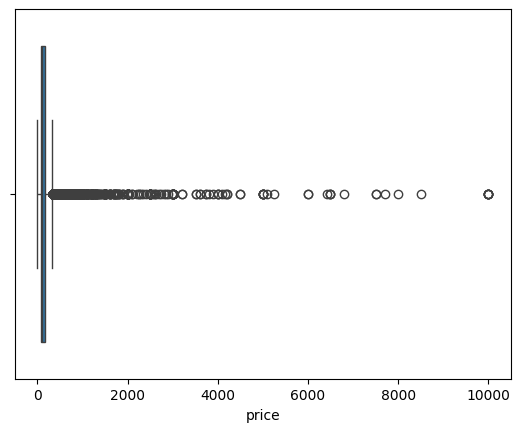

In [21]:
sns.boxplot(x = data['price'])
plt.show()

Removing outliers using Inter Quartile Range

In [22]:
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

In [23]:
lower_bound,upper_bound = iqr_technique(data['price'])

data = data[(data.price>lower_bound) & (data.price<upper_bound)]

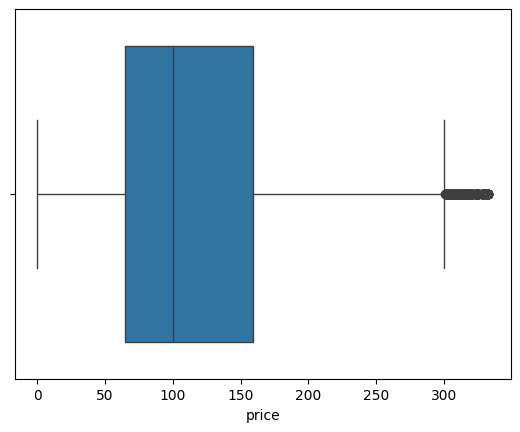

In [24]:
sns.boxplot(x = data['price'])
plt.show()

Maximum Listed price

In [25]:
data['price'].max()

np.int64(333)

Distribution of Airbnb Prices

Text(0.5, 1.0, 'Distribution of Airbnb Prices')

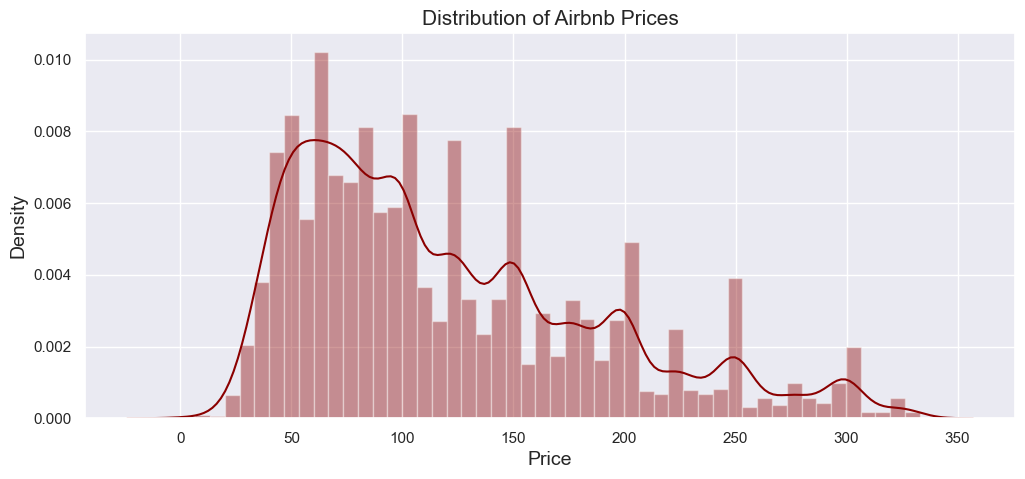

In [70]:
#Visualizing data
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.distplot(data['price'],color=('darkred'))
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Airbnb Prices',fontsize=15)

Number of listed properties based on the neighbourhood regions

In [30]:
counts = data['neighbourhood_group'].value_counts()
counts

neighbourhood_group
Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: count, dtype: int64

In [34]:
Top_Neighborhood_group = counts.reset_index()
Top_Neighborhood_group

neighbourhood_group  count
0           Manhattan  19501
1            Brooklyn  19415
2              Queens   5567
3               Bronx   1070
4       Staten Island    365

In [35]:
Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']
Top_Neighborhood_group

Neighborhood_Groups  Listing_Counts
0           Manhattan           19501
1            Brooklyn           19415
2              Queens            5567
3               Bronx            1070
4       Staten Island             365

Most listings according to region

Text(0, 0.5, 'total listings counts')

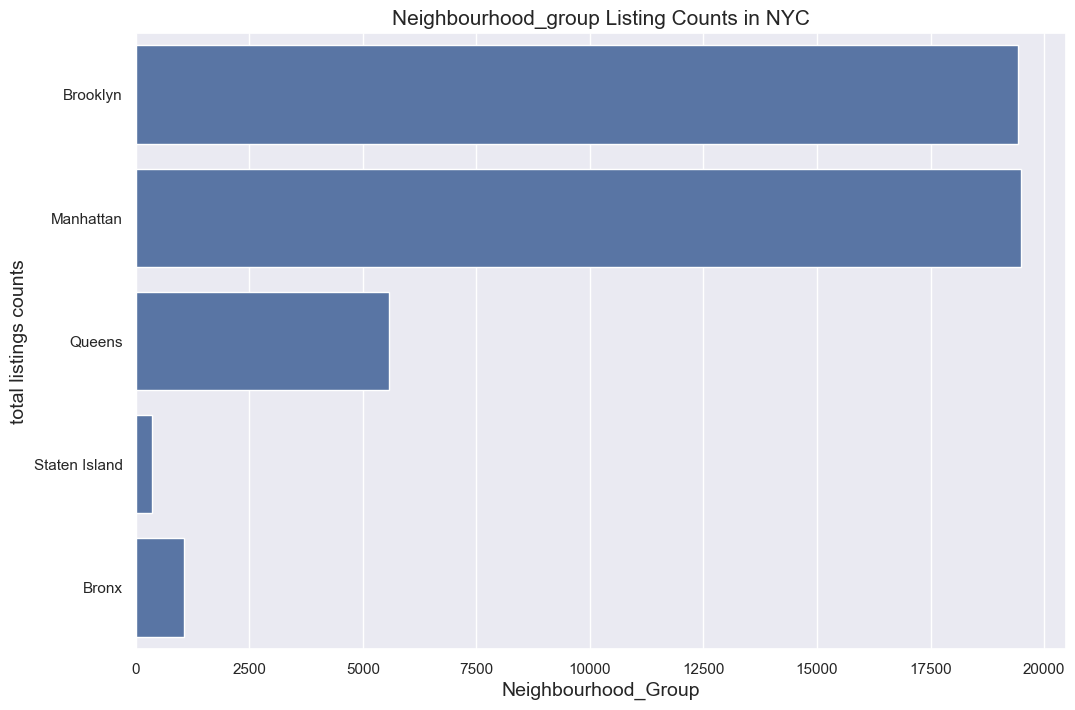

In [36]:
plt.figure(figsize=(12, 8))
sns.countplot(data['neighbourhood_group'])

plt.title('Neighbourhood_group Listing Counts in NYC', fontsize=15)

plt.xlabel('Neighbourhood_Group', fontsize=14)

plt.ylabel('total listings counts', fontsize=14)

Average price per region

In [37]:
grouped = data.groupby("neighbourhood_group").mean(numeric_only = True)

neighbourhood_group_avg_price = grouped.reset_index()

neighbourhood_group_avg_price = round(neighbourhood_group_avg_price.rename(columns={"price": "avg_price"}),2)

neighbourhood_group_avg_price[['neighbourhood_group', 'avg_price']].head()

neighbourhood_group  avg_price
0               Bronx      77.37
1            Brooklyn     105.70
2           Manhattan     145.90
3              Queens      88.90
4       Staten Island      89.24

Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

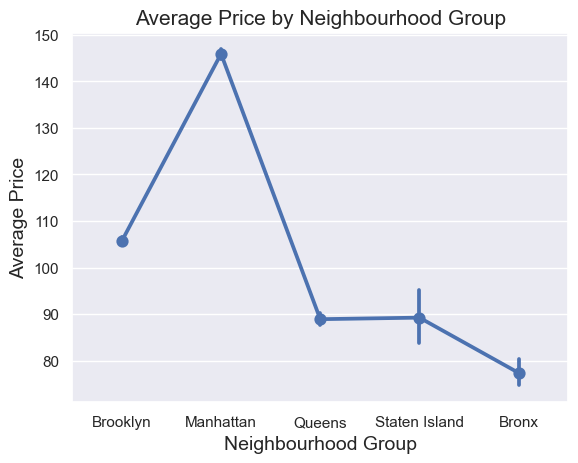

In [38]:
from statistics import mean

sns.pointplot(x = 'neighbourhood_group', y='price', data=data, estimator = mean)

plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

Distribution of price as per region

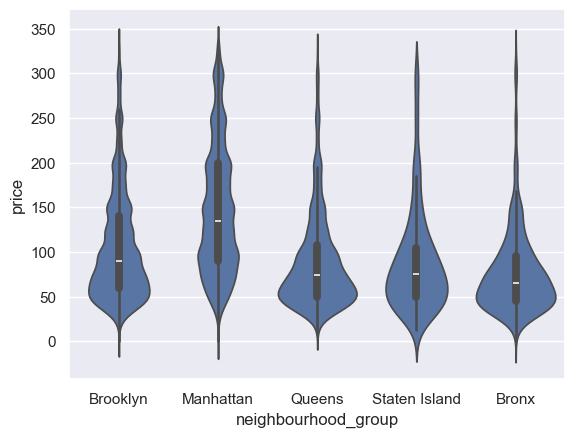

In [39]:
violinplot = sns.violinplot(x='neighbourhood_group',y='price',data= data)
plt.show()

Top most Neighbourhoods

In [40]:
Top_Neighborhoods = data['neighbourhood'].value_counts()[:10].reset_index()

Top_Neighborhoods.columns = ['Top_Neighborhoods', 'Listing_Counts']
Top_Neighborhoods

Top_Neighborhoods  Listing_Counts
0        Williamsburg            3732
1  Bedford-Stuyvesant            3638
2              Harlem            2585
3            Bushwick            2438
4     Upper West Side            1788
5      Hell's Kitchen            1731
6        East Village            1714
7     Upper East Side            1670
8       Crown Heights            1519
9             Midtown            1143

Text(0.5, 1.0, 'Listings by Top Neighborhoods in NYC')

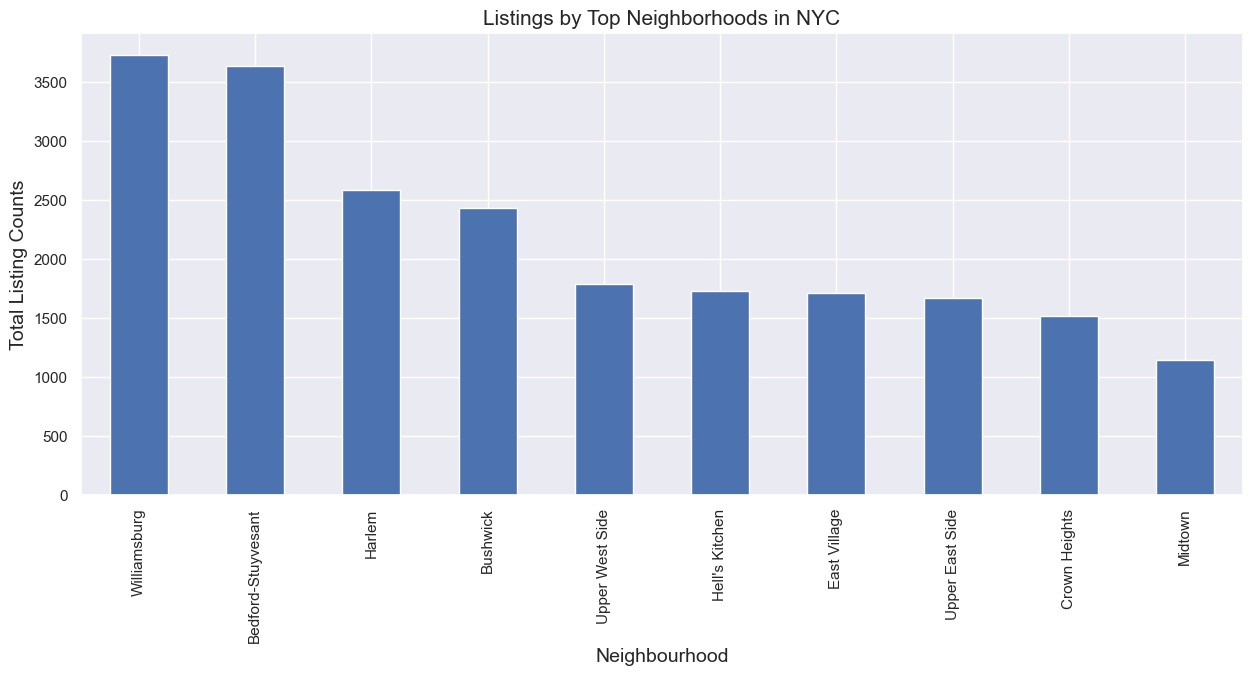

In [41]:
top_10_neigbourhoods = data['neighbourhood'].value_counts().nlargest(10)
top_10_neigbourhoods.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Total Listing Counts', fontsize=14)
plt.title('Listings by Top Neighborhoods in NYC', fontsize=15)

Hosts with most listing of properties

In [42]:
top_10_hosts = data['host_name'].value_counts()[:10].reset_index()
top_10_hosts.columns = ['host_name', 'Total_listings']
top_10_hosts

host_name  Total_listings
0       Michael             383
1         David             368
2          John             276
3  Sonder (NYC)             272
4          Alex             253
5         Sarah             221
6        Daniel             212
7         Maria             197
8       Jessica             185
9          Mike             184

Text(0.5, 1.0, 'Listings by Top Hosts in NYC')

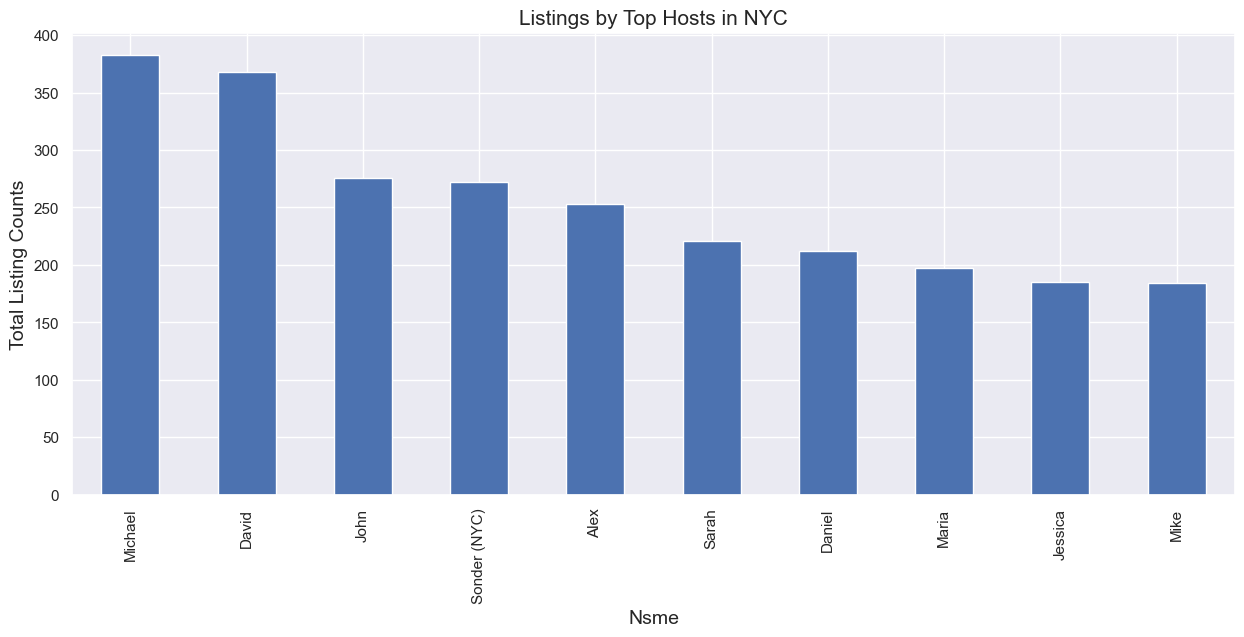

In [43]:
top_10_hosts = data['host_name'].value_counts().nlargest(10)
top_10_hosts.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Nsme', fontsize=14)
plt.ylabel('Total Listing Counts', fontsize=14)
plt.title('Listings by Top Hosts in NYC', fontsize=15)

Number of active hosts per region 

In [72]:
hosts_per_location = data.groupby('neighbourhood_group')['listing_id'].count().reset_index()
hosts_per_location.columns = ['Neighbourhood_Groups', 'Host_counts']
hosts_per_location

Neighbourhood_Groups  Host_counts
0                Bronx         1070
1             Brooklyn        19415
2            Manhattan        19501
3               Queens         5567
4        Staten Island          365

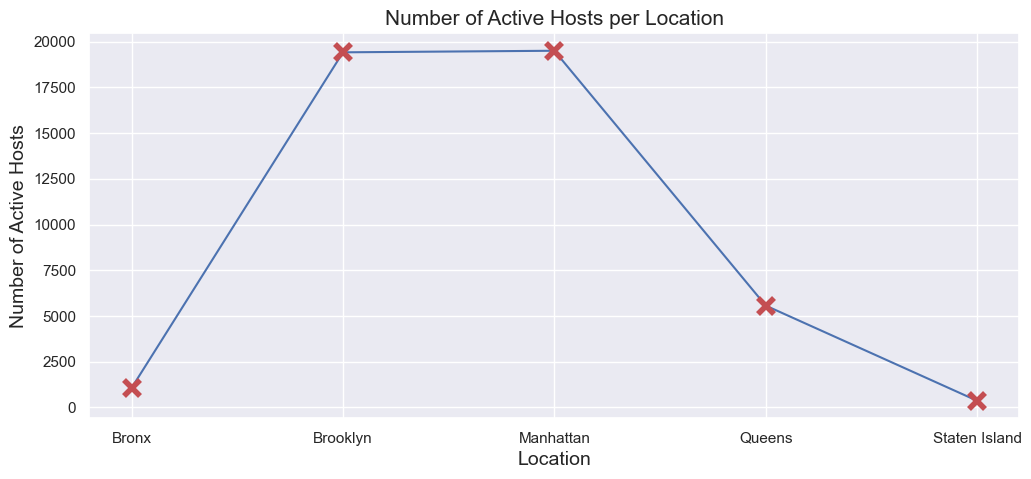

In [73]:
hosts_per_location = data.groupby('neighbourhood_group')['listing_id'].count()

locations = hosts_per_location.index
host_counts = hosts_per_location.values
plt.figure(figsize=(12, 5))
plt.plot(locations, host_counts, marker='x', ms=12, mew=4, mec='r')
plt.title('Number of Active Hosts per Location', fontsize='15')
plt.xlabel('Location', fontsize='14')
plt.ylabel('Number of Active Hosts', fontsize='14')
plt.show()

Price in each region

In [ ]:
neighbourhood_avg_price = data.groupby("neighbourhood").mean(numeric_only = True).reset_index().rename(columns={"price": "avg_price"})[['neighbourhood', 'avg_price']]

neighbourhood_avg_price = neighbourhood_avg_price.sort_values("avg_price").head(10)

neighbourhood_avg_price_sorted_with_group = neighbourhood_avg_price.join(data[['neighbourhood', 'neighbourhood_group']].drop_duplicates().set_index('neighbourhood'),
                                                                         on='neighbourhood')
display(neighbourhood_avg_price_sorted_with_group)

neighbourhood  avg_price neighbourhood_group
27      Bull's Head  47.333333       Staten Island
101     Hunts Point  50.500000               Bronx
195         Tremont  51.545455               Bronx
178       Soundview  53.466667               Bronx
50           Corona  54.412698              Queens
140        New Dorp  57.000000       Staten Island
24        Bronxdale  57.105263               Bronx
141  New Dorp Beach  57.400000       Staten Island
87       Grant City  57.666667       Staten Island
46          Concord  58.192308       Staten Island

<Axes: title={'center': 'Average Airbnb Price by Neighborhoods in New York City'}, xlabel='longitude', ylabel='latitude'>

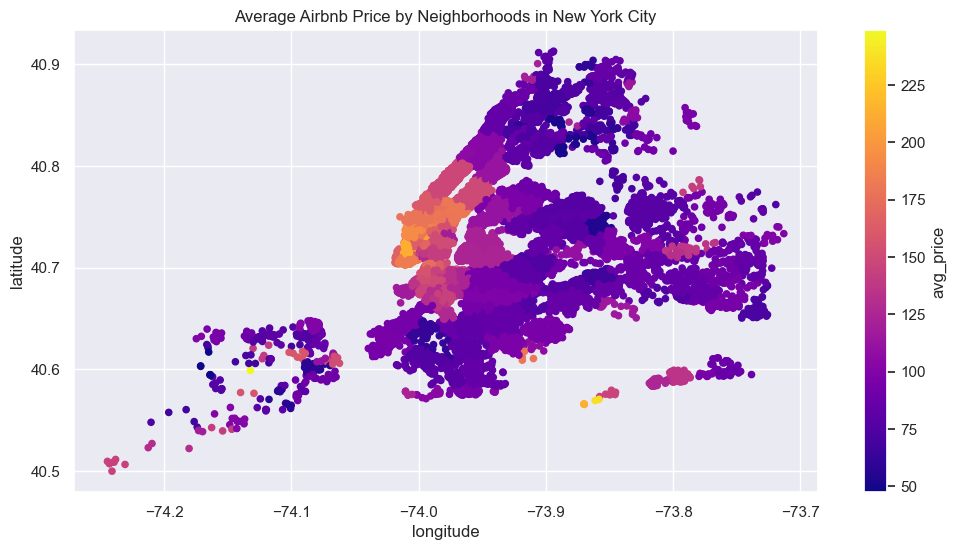

In [ ]:
neighbourhood_avg_price = (data.groupby("neighbourhood").mean(numeric_only  = True).reset_index().rename(columns={"price": "avg_price"}))[['neighbourhood', 'avg_price']]
neighbourhood_avg_price = (neighbourhood_avg_price.sort_values("avg_price"))
neighbourhood_avg_price = data.groupby("neighbourhood")["price"].mean()
neighbourhood_prices = pd.DataFrame({"neighbourhood": neighbourhood_avg_price.index, "avg_price": neighbourhood_avg_price.values})

df = data.merge(neighbourhood_prices, on="neighbourhood")

fig = df.plot.scatter(x="longitude", y="latitude", c="avg_price", title="Average Airbnb Price by Neighborhoods in New York City", figsize=(12,6), cmap="plasma")
fig

Share of type of rooms

In [48]:
top_room_type = data['room_type'].value_counts().reset_index()
top_room_type.columns = ['Room_Type', 'Total_counts']
top_room_type

Room_Type  Total_counts
0  Entire home/apt         22784
1     Private room         21996
2      Shared room          1138

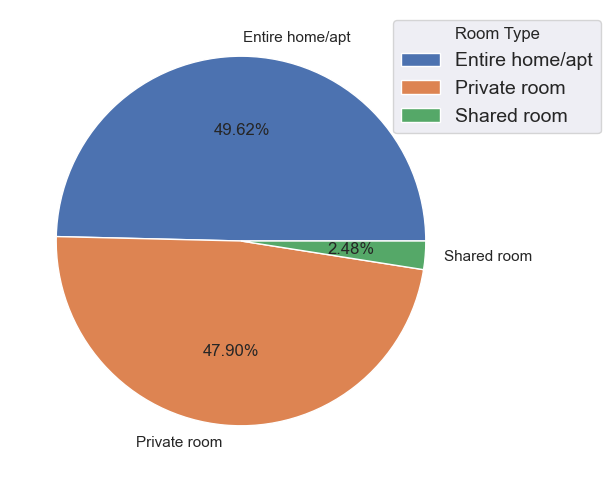

In [ ]:
plt.figure(figsize=(10, 6))
room_type_counts = data['room_type'].value_counts()
labels = room_type_counts.index
sizes = room_type_counts.values
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.legend(title='Room Type', bbox_to_anchor=(0.8, 0, 0.5, 1), fontsize='14')
plt.show()

Minimum number of nights occupied

In [61]:
min_nights_count = data.groupby('minimum_nights').size().reset_index(name = 'count')
min_nights_count = min_nights_count.sort_values('count', ascending=False)

min_nights_count = min_nights_count.head(15)

min_nights_count = min_nights_count.reset_index(drop=True)
min_nights_count

minimum_nights  count
0                1  12067
1                2  11080
2                3   7375
3               30   3489
4                4   3066
5                5   2821
6                7   1951
7                6    679
8               14    539
9               10    462
10              29    327
11              15    272
12              20    215
13              31    189
14              28    173

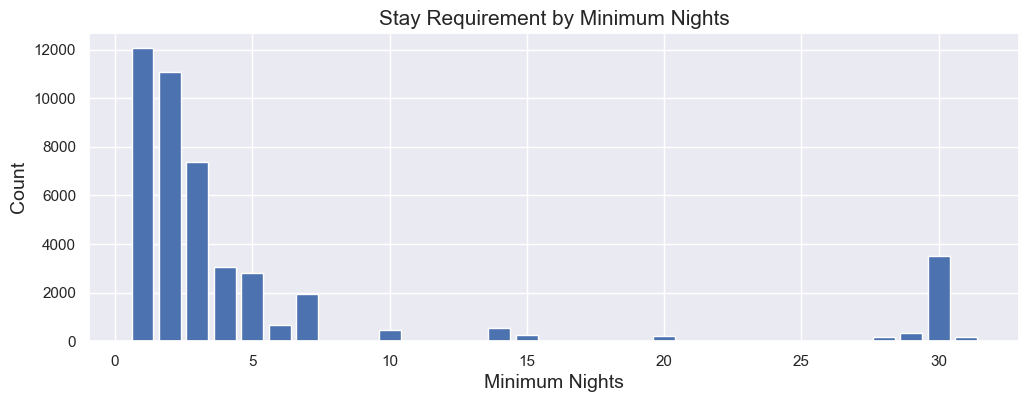

In [62]:
minimum_nights = min_nights_count['minimum_nights']
count = min_nights_count['count']
plt.figure(figsize=(12, 4))

plt.bar(minimum_nights, count)

plt.xlabel('Minimum Nights', fontsize='14')
plt.ylabel('Count', fontsize='14')
plt.title('Stay Requirement by Minimum Nights', fontsize='15')
plt.show()

Number of reviews in region

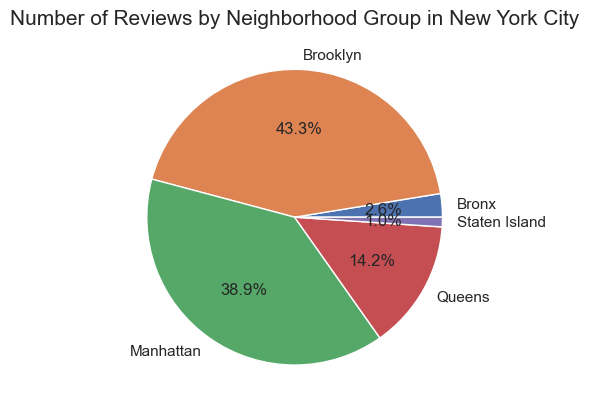

In [ ]:
reviews_by_neighbourhood_group = data.groupby("neighbourhood_group")["total_reviews"].sum()

plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%')
plt.title("Number of Reviews by Neighborhood Group in New York City", fontsize='15')
plt.show()

Type of room per region of neighbourhood

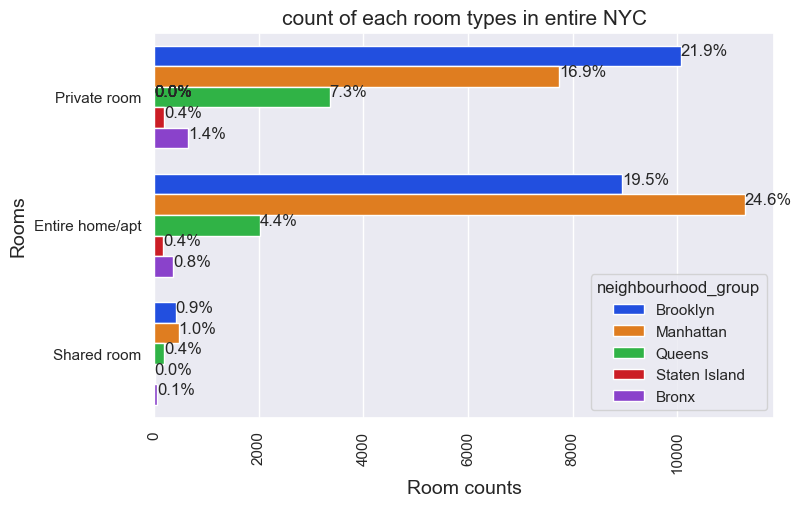

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(y='room_type', hue='neighbourhood_group', data=data, palette='bright')
total = len(data['room_type'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC', fontsize='15')
plt.xlabel('Room counts', fontsize='14')
plt.xticks(rotation=90)
plt.ylabel('Rooms', fontsize='14')
plt.show()

Text(0.5, 1.0, 'Location Co-ordinates')

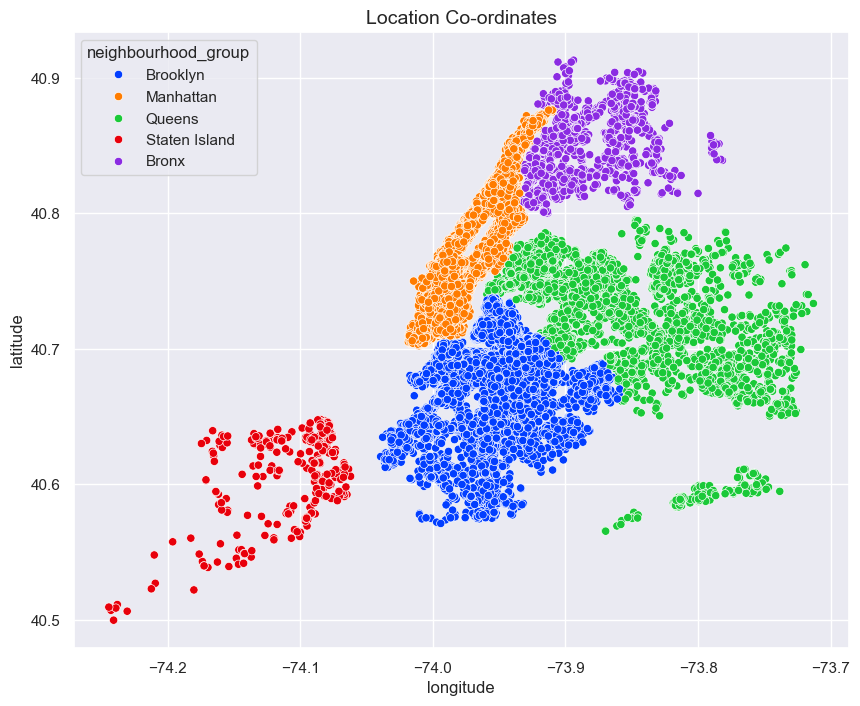

In [52]:
sns.set(rc={"figure.figsize": (10, 8)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset
ax = sns.scatterplot(data=data, x="longitude", y="latitude", hue='neighbourhood_group', palette='bright')

# set the title of the plot
ax.set_title('Location Co-ordinates', fontsize='14')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

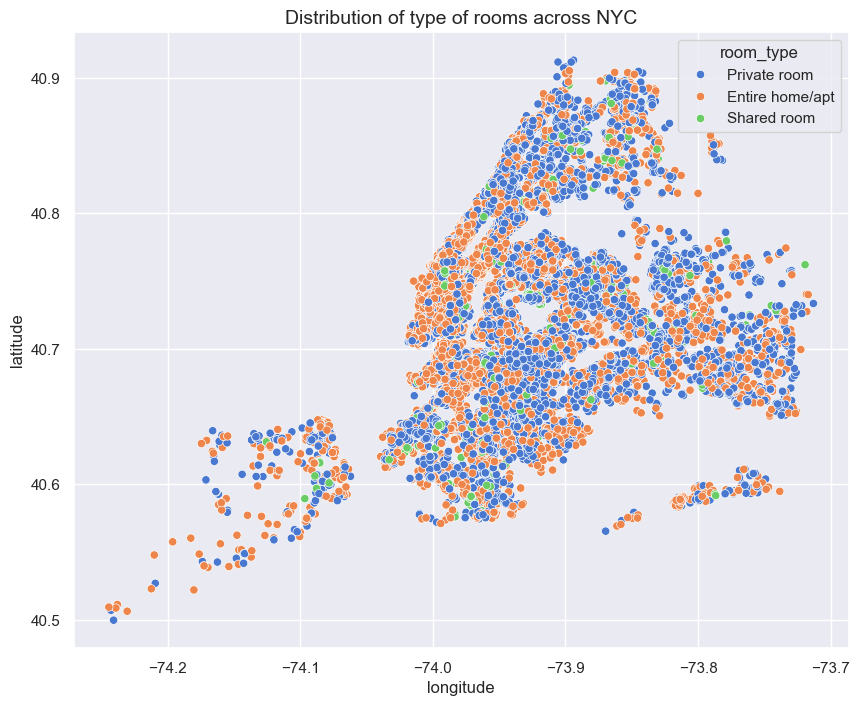

In [53]:
sns.set(rc={"figure.figsize": (10, 8)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset with room_types.
ax = sns.scatterplot(x=data.longitude, y=data.latitude, hue=data.room_type, palette='muted')
ax.set_title('Distribution of type of rooms across NYC', fontsize='14')

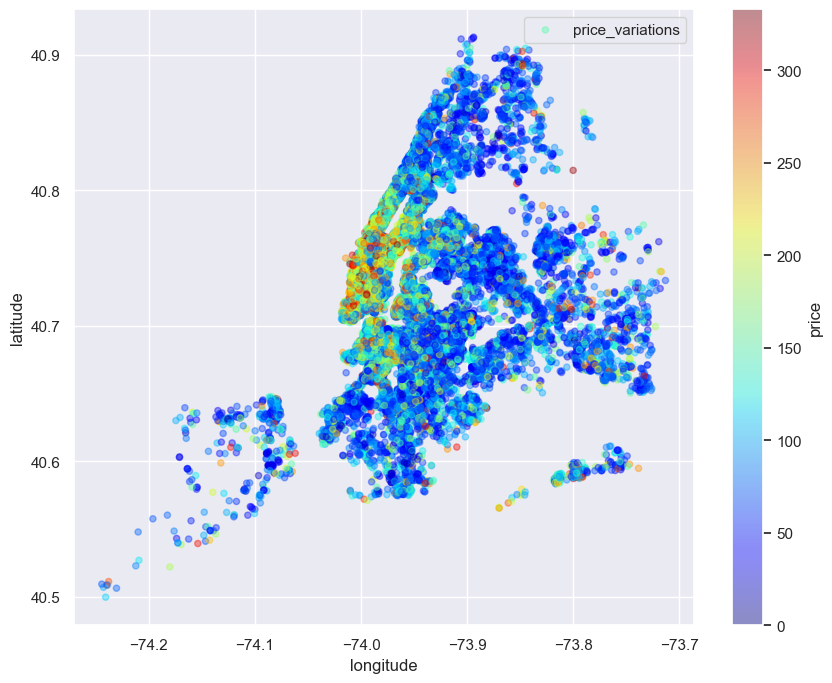

In [54]:
lat_long = data.plot(kind='scatter', x='longitude', y='latitude', label='price_variations', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8))

# add a legend to the plot
lat_long.legend()

In [55]:
corre = data.corr(numeric_only = True)

# Display the correlation between columns
corre

listing_id   host_id  latitude  longitude     price  \
listing_id             1.000000  0.581439 -0.008072   0.101403 -0.018180   
host_id                0.581439  1.000000  0.015965   0.144330 -0.034812   
latitude              -0.008072  0.015965  1.000000   0.091354  0.068789   
longitude              0.101403  0.144330  0.091354   1.000000 -0.306922   
price                 -0.018180 -0.034812  0.068789  -0.306922  1.000000   
minimum_nights        -0.013841 -0.017972  0.025853  -0.064128  0.031141   
total_reviews         -0.320428 -0.136529 -0.012515   0.053831 -0.027547   
reviews_per_month      0.189768  0.216020 -0.015752   0.135783 -0.041992   
host_listings_count    0.125179  0.147276  0.021285  -0.107333  0.172891   
availability_365       0.073188  0.193673 -0.017492   0.097181  0.066179   

                     minimum_nights  total_reviews  reviews_per_month  \
listing_id                -0.013841      -0.320428           0.189768   
host_id                   -0.017972      -0.136529           0.216020   
latitude                   0.025853      -0.012515          -0.015752   
longitude                 -0.064128       0.053831           0.135783   
price                      0.031141      -0.027547          -0.041992   
minimum_nights             1.000000      -0.082851          -0.117291   
total_reviews             -0.082851       1.000000           0.562593   
reviews_per_month         -0.117291       0.562593           1.000000   
host_listings_count        0.133237      -0.070357          -0.043678   
availability_365           0.146329       0.183707           0.156463   

                     host_listings_count  availability_365  
listing_id                      0.125179          0.073188  
host_id                         0.147276          0.193673  
latitude                        0.021285         -0.017492  
longitude                      -0.107333          0.097181  
price                           0.172891          0.066179  
minimum_nights                  0.133237          0.146329  
total_reviews                  -0.070357          0.183707  
reviews_per_month              -0.043678          0.156463  
host_listings_count             1.000000          0.225251  
availability_365                0.225251          1.000000

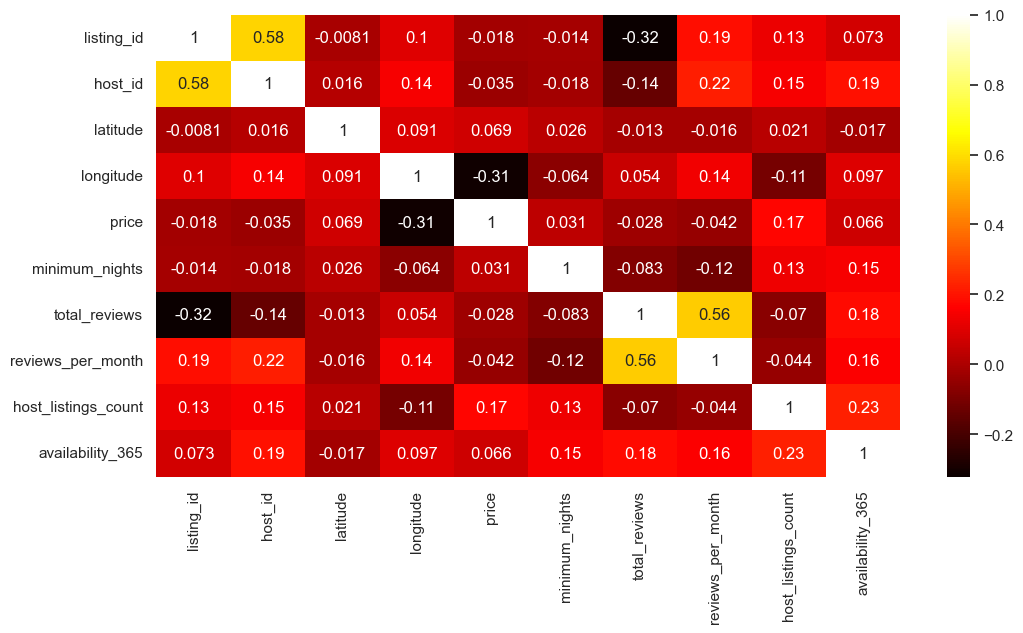

In [59]:
plt.figure(figsize=(12,6))

# Visualize correlations as a heatmap
sns.heatmap(corre, cmap='hot',annot=True)

# Display heatmap
plt.show()

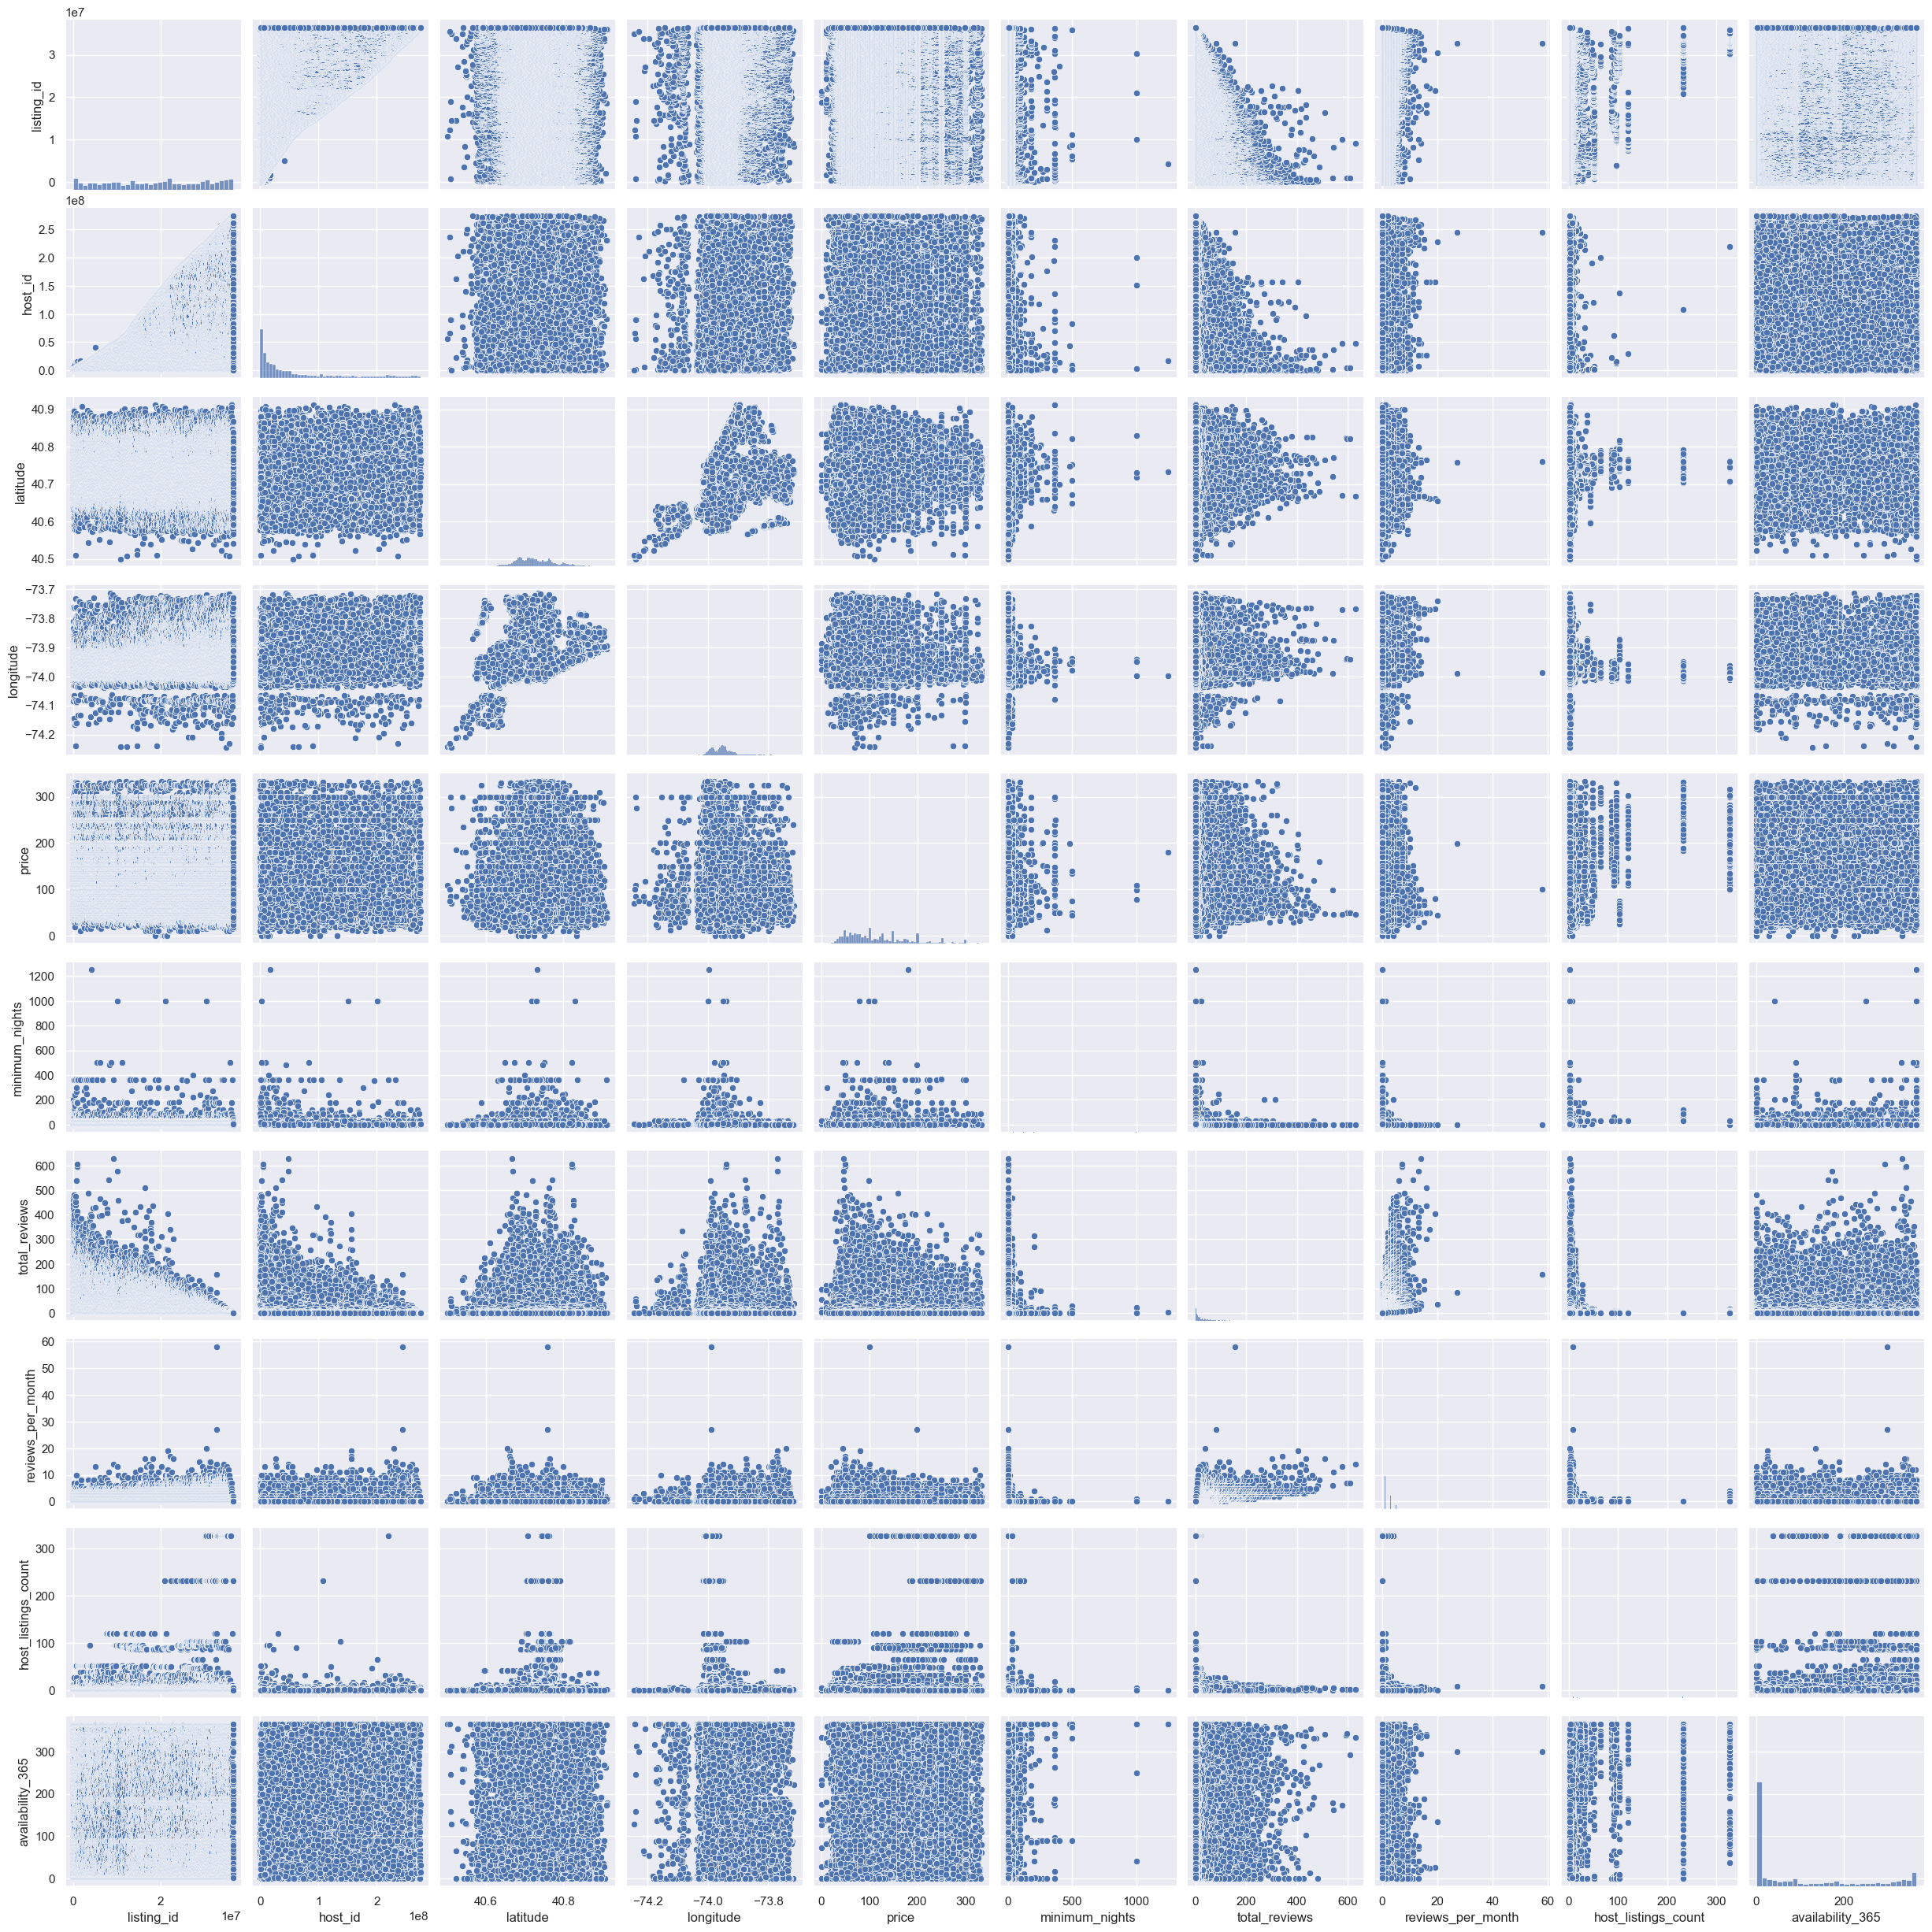

In [57]:
sns.pairplot(data)

# show the plot
plt.show()